In [739]:
from utils import *
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

In [740]:
data = importpbdatapandas(0)
print (data)

        pt    eta    phi  charge
0    1.094 -0.085 -3.055       1
1    1.418  1.417 -3.025       1
2    1.438 -1.569 -2.996       1
3    1.132 -1.061 -2.986       1
4    2.352 -0.350 -2.867       1
..     ...    ...    ...     ...
239  1.557 -1.594  2.463      -1
240  1.287 -2.282 -1.011      -1
241  0.917  2.180  1.562      -1
242  1.124  2.316 -0.952      -1
243  3.304  2.127 -0.447       1

[244 rows x 4 columns]


In [741]:
phi = data[data.columns[2]]
dphi = np.diff(phi)

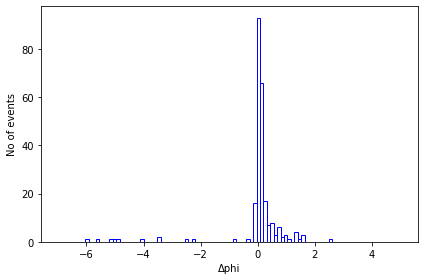

In [742]:
nbins = 100
xmin = -7
xmax = 5
plt.hist(dphi,nbins,color="white", edgecolor="blue",range = [xmin,xmax])
plt.ylabel(r'No of events')
plt.xlabel(r'Δphi')
plt.tight_layout()  
plt.show()

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  1.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  1.  0. 16. 93. 66. 17.  7.  8.  3.  6.  2.  3.  1.  0.  4.  1.  3.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [-7.   -6.88 -6.76 -6.64 -6.52 -6.4  -6.28 -6.16 -6.04 -5.92 -5.8  -5.68
 -5.56 -5.44 -5.32 -5.2  -5.08 -4.96 -4.84 -4.72 -4.6  -4.48 -4.36 -4.24
 -4.12 -4.   -3.88 -3.76 -3.64 -3.52 -3.4  -3.28 -3.16 -3.04 -2.92 -2.8
 -2.68 -2.56 -2.44 -2.32 -2.2  -2.08 -1.96 -1.84 -1.72 -1.6  -1.48 -1.36
 -1.24 -1.12 -1.   -0.88 -0.76 -0.64 -0.52 -0.4  -0.28 -0.16 -0.04  0.08
  0.2   0.32  0.44  0.56  0.68  0.8   0.92  1.04  1.16  1.28  1.4   1.52
  1.64  1.76  1.88  2.    2.12  2.24  2.36  2.48  2.6   2.72  2.84  2.96
  3.08  3.2   3.32  3.44  3.56  3.68  3.8   3.92  4.04  4.16  4.28  4.4
  4.52  4.6

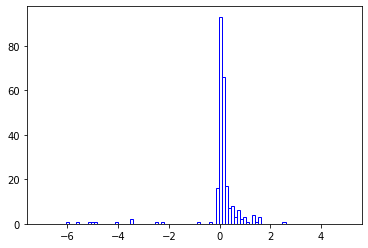

In [743]:
counts, bins, bars= plt.hist(dphi,nbins,color="white", edgecolor="blue",range = [xmin,xmax])
print (counts, bins, bars)

In [744]:
zphi = ('1,   4,   3,   2,   0, 177,  51,   5,   0,   0')

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  1.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  1.  0. 16. 93. 66. 17.  7.  8.  3.  6.  2.  3.  1.  0.  4.  1.  3.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


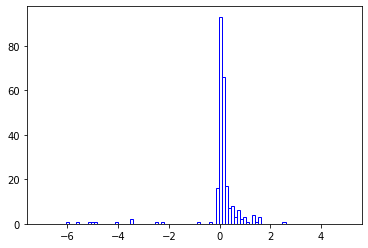

In [745]:
counts1, bins, bars2 = plt.hist(dphi,nbins,color="white", edgecolor="blue",range = [xmin,xmax])
print (counts1)

In [746]:
eta = data[data.columns[1]]
deta = np.diff(eta)

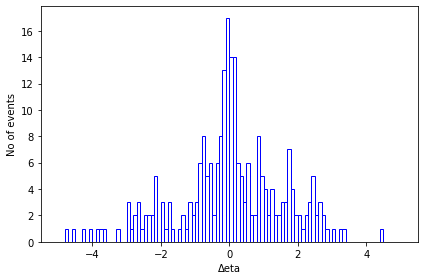

In [747]:
nbins = 100
xmin = -5
xmax = 5
plt.hist(deta,nbins,color="white", edgecolor="blue",range = [xmin,xmax])
plt.ylabel(r'No of events')
plt.xlabel(r'Δeta')
plt.tight_layout()  
plt.show()

[ 0.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.  0.  0.  1.
  0.  0.  3.  1.  2.  3.  1.  2.  2.  2.  5.  0.  3.  1.  3.  1.  0.  1.
  2.  1.  3.  2.  3.  6.  8.  5.  6.  2.  6.  8. 13. 17. 14. 14.  6.  5.
  3.  6.  2.  2.  8.  5.  4.  2.  4.  2.  2.  3.  3.  7.  4.  2.  2.  1.
  2.  3.  5.  2.  3.  2.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


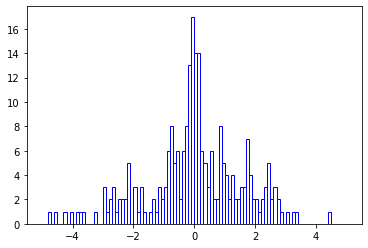

In [748]:
counts2, bins, bars2 = plt.hist(deta,nbins,color="white", edgecolor="blue",range = [xmin,xmax])
print (counts2)

In [749]:
zeta = ('4,  4, 21, 17, 74, 65, 33, 21,  3,  1')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


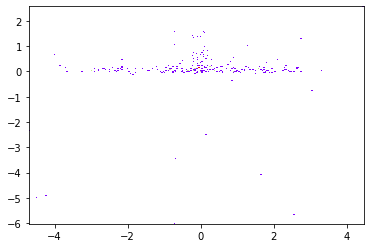

In [750]:
counts,xbins,ybins,image = plt.hist2d(deta,dphi,bins=243,norm=LogNorm(), cmap = plt.cm.rainbow)
print (counts)


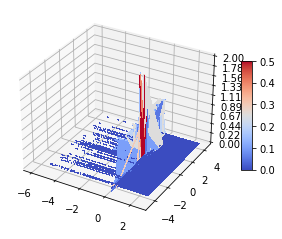

In [751]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = dphi
Y = deta
X, Y = np.meshgrid(X, Y)
Z = counts

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 2)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

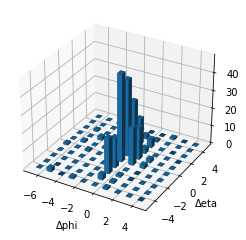

In [752]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = dphi
y = deta
hist, xedges, yedges = np.histogram2d(x, y, bins=10, range=[[-7, 5], [-5, 5]])


xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.xlabel(r'Δphi', fontsize = 10)
plt.ylabel(r'Δeta', fontsize = 10)
plt.show()

C:\Users\92307\AppData\Local\Temp\ipykernel_18784\1535197086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eta[i] = np.random.rand()*2.0 - 1.0
C:\Users\92307\AppData\Local\Temp\ipykernel_18784\1535197086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phi[i] = np.random.rand()*3.14159*2


i =  0 -0.9673807728201336 4.927047881807522
i =  1 0.7034264331402609 2.389795525809732
i =  2 0.5853254231346883 1.0570300938479371
i =  3 -0.27765335294883875 2.345709159412224
i =  4 0.2311480503543495 0.6062301735140637
i =  5 0.8493320146024197 6.1257566014263904
i =  6 0.16042149553121487 6.056213489870837
i =  7 0.5328931598778526 5.130990886365366
i =  8 -0.48437365257112885 3.6046761766295705
i =  9 -0.7088386462055203 2.3194040898380135
i =  10 0.16577594469974355 1.8706307301508713
i =  11 0.38896169415422355 6.19649146487671
i =  12 -0.5278584613170447 1.4794739678515823
i =  13 0.49369171853311244 2.032241320014099
i =  14 -0.14850139014905106 4.513972816213861
i =  15 -0.03588211820813769 2.250897940625405
i =  16 0.6960839934160525 3.1105006110353552
i =  17 -0.6410391574399188 0.47064094815611546
i =  18 0.38807152120907484 0.14780257488184081
i =  19 0.4353741546642049 1.51432467850997
i =  20 -0.7825334965014625 1.7811687289886542
i =  21 0.24545783357636908 4.591757

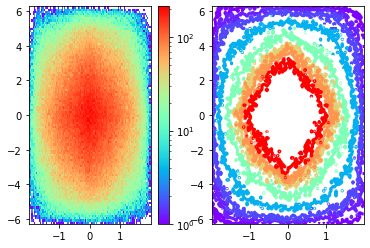

In [753]:
num_particles = 1000
for i in range(1000):
    eta[i] = np.random.rand()*2.0 - 1.0
    phi[i] = np.random.rand()*3.14159*2
    print("i = ",i, eta[i], phi[i])
deta = []
dphi = []
for i in range(1000):
    for j in range(i+1,1000):
        d1 = eta[i] - eta[j]
        d2 = phi[i] - phi[j]
        deta.append(d1)
        dphi.append(d2)
plt.subplot(121)
counts,xbins,ybins,image = plt.hist2d(deta,dphi,bins=100,norm=LogNorm(), cmap = plt.cm.rainbow)
plt.colorbar()
plt.subplot(122)
plt.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=3, cmap = plt.cm.rainbow, levels = [1,5,10,25,50,70,80,100])

In [754]:
surf = ax.plot_surface(dphi, deta, counts, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 3)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (499500,) and arg 2 with shape (100, 100).

MemoryError: Unable to allocate 1.82 TiB for an array with shape (499500, 499500) and data type float64

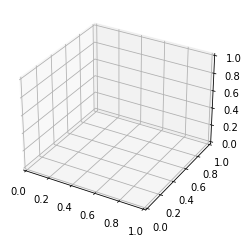

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = dphi
Y = deta
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X2 + Y2)
Z = counts

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()